Data Loaded Successfully!

=== PERFORMANCE METRICS ===

Average Delivery Time: 5.83 days
On-Time Delivery Rate: 66.67%

Average Cost Per Unit by Supplier:
 Supplier
ABC Ltd    50.0
LMN Inc    50.0
XYZ Pvt    50.0
Name: CostPerUnit, dtype: float64


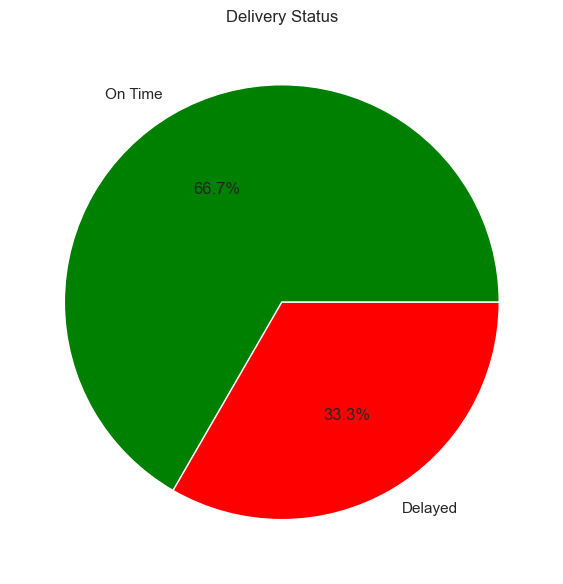

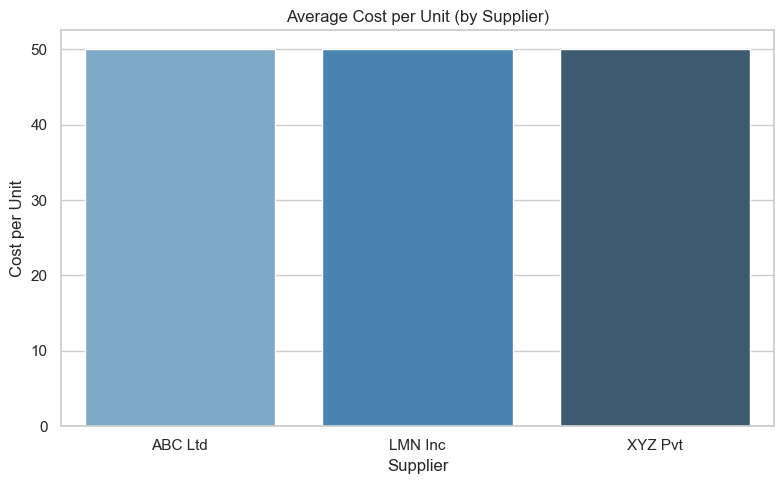

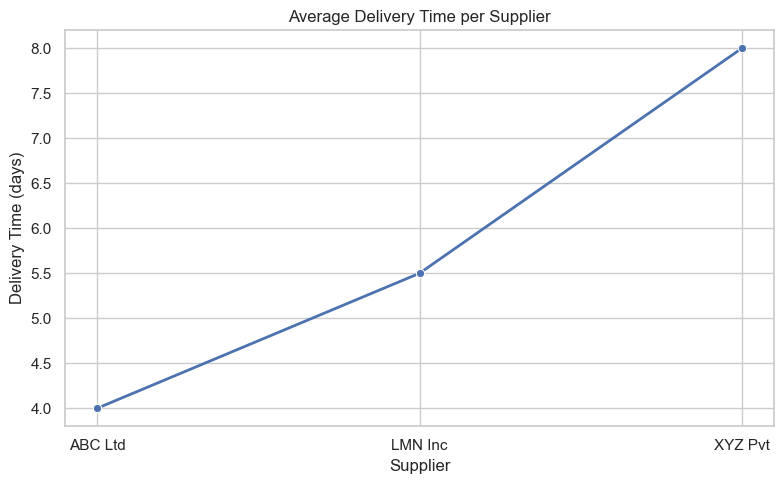

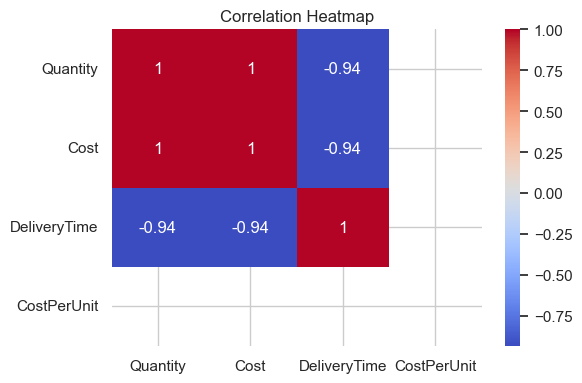

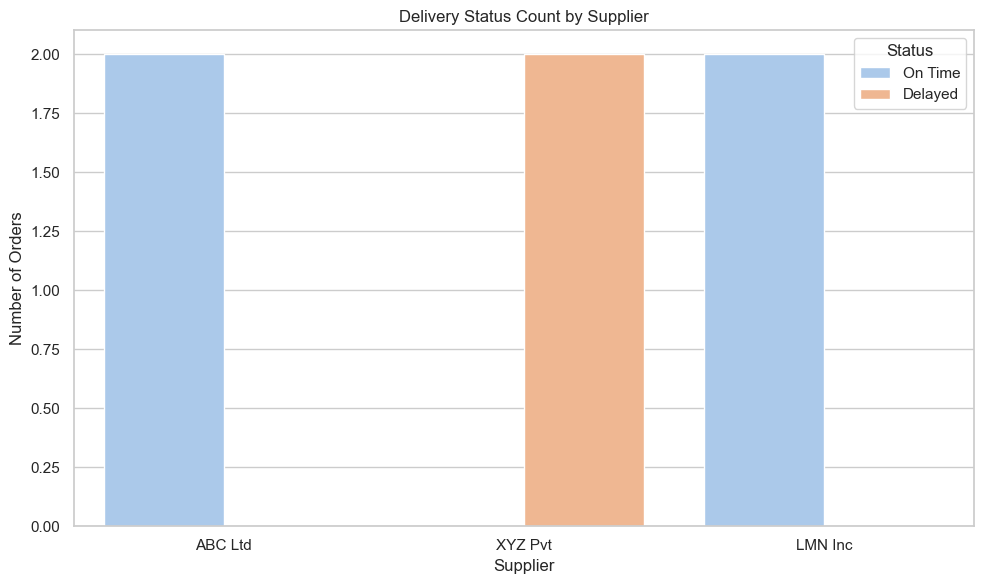

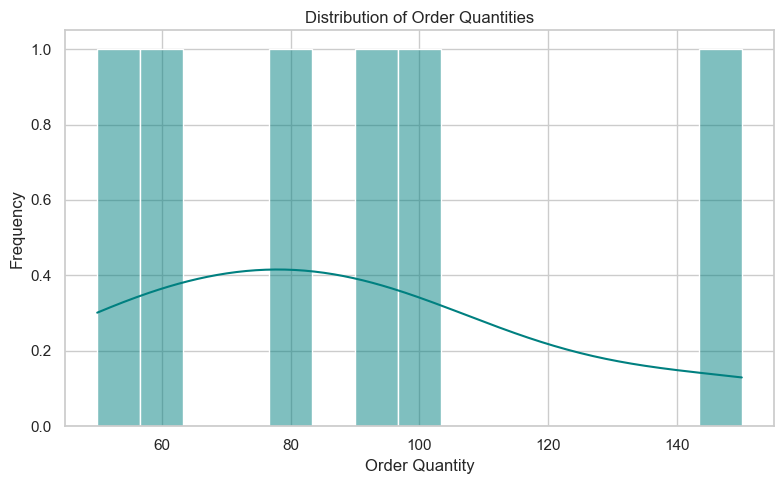

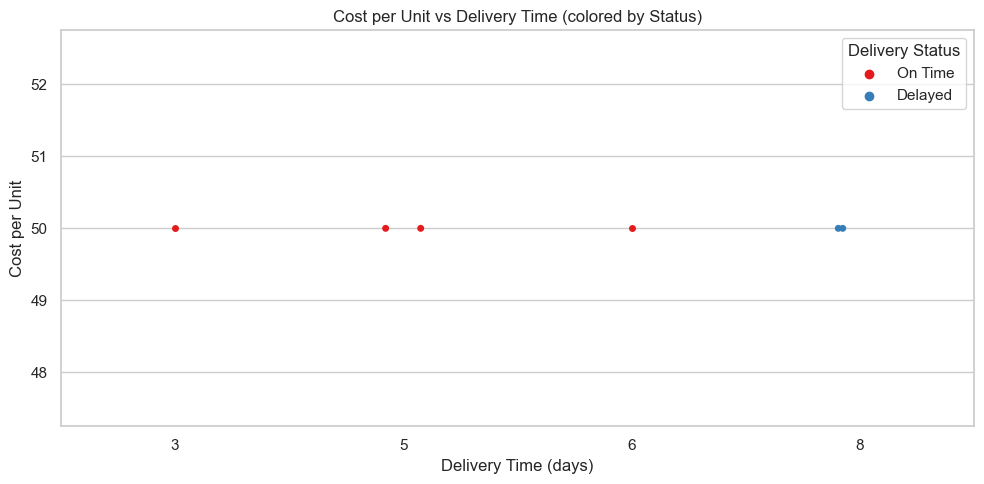

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Load the dataset
data = pd.read_csv(r"C:\Users\KISHORE\OneDrive\Documents\karthik S\supply_chain_data.csv")
print("Data Loaded Successfully!\n")

# Convert dates and calculate delivery time
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['DeliveryDate'] = pd.to_datetime(data['DeliveryDate'])
data['DeliveryTime'] = (data['DeliveryDate'] - data['OrderDate']).dt.days
data['CostPerUnit'] = data['Cost'] / data['Quantity']

# -------------------- PERFORMANCE METRICS --------------------
print("=== PERFORMANCE METRICS ===\n")

# Average Delivery Time
avg_delivery = data['DeliveryTime'].mean()
print(f"Average Delivery Time: {avg_delivery:.2f} days")

# On-Time Delivery Rate
on_time_rate = (data['Status'] == "On Time").mean() * 100
print(f"On-Time Delivery Rate: {on_time_rate:.2f}%")

# Average Cost Per Unit by Supplier
avg_cost = data.groupby('Supplier')['CostPerUnit'].mean()
print("\nAverage Cost Per Unit by Supplier:\n", avg_cost)

# -------------------------------------------------------------

# -------------------- VISUALIZATIONS -------------------------

# 1. Pie Chart - Delivery Performance
plt.figure(figsize=(6, 6))
data['Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'red'], title='Delivery Status')
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Bar Chart - Average Cost per Unit by Supplier
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_cost.index, y=avg_cost.values, palette='Blues_d')
plt.title("Average Cost per Unit (by Supplier)")
plt.xlabel("Supplier")
plt.ylabel("Cost per Unit")
plt.tight_layout()
plt.show()

# 3. Line Chart - Average Delivery Time per Supplier
plt.figure(figsize=(8, 5))
avg_delivery_supplier = data.groupby('Supplier')['DeliveryTime'].mean().reset_index()
sns.lineplot(data=avg_delivery_supplier, x='Supplier', y='DeliveryTime', marker='o', linewidth=2)
plt.title("Average Delivery Time per Supplier")
plt.ylabel("Delivery Time (days)")
plt.tight_layout()
plt.show()

# 4. Heatmap - Correlation between numeric fields
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Quantity', 'Cost', 'DeliveryTime', 'CostPerUnit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 5. Count Plot - Order Status by Supplier
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Supplier', hue='Status', palette='pastel')
plt.title("Delivery Status Count by Supplier")
plt.xlabel("Supplier")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# 6. histogram
plt.figure(figsize=(8, 5))
sns.histplot(data['Quantity'], bins=15, kde=True, color='teal')
plt.title("Distribution of Order Quantities")
plt.xlabel("Order Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.stripplot(data=data, x='DeliveryTime', y='CostPerUnit', hue='Status', palette='Set1', jitter=True)
plt.title("Cost per Unit vs Delivery Time (colored by Status)")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Cost per Unit")
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()
